@article{Pilgrim2021, 
         doi = {10.21105/joss.03859}, 
         url = {https://doi.org/10.21105/joss.03859}, 
         year = {2021}, publisher = {The Open Journal}, 
         volume = {6}, 
         number = {68}, 
         pages = {3859}, 
         author = {Charlie Pilgrim}, 
         title = {piecewise-regression (aka segmented regression) in Python}, 
         journal = {Journal of Open Source Software}
        }

In [1]:
# General-level imports:
import os
import datetime

import numpy as np
import pandas as pd

# For data-reading capabilities:
from seppy.tools import Event

# Importing the Regression-Onset tool:
import regression_onset_tool as reg
from regression_onset_tool import select_data

## Selecting the data file; choose either SEPpy or Local

> SEPpy employs automatic data-loading capabilities online

> Local searches for the data file on your computer

In [2]:
display(select_data.data_file)

ToggleButtons(description='Data source: ', options=('SEPpy', 'User defined'), tooltips=('Select SEPpy for data…

### Use either SEPpy to acquire the desired data, or directly choose your own file below:

In [37]:
# This is the path to your data directory
path = f"data{os.sep}"

# The name of your data file, if you're loading in your own data. 
filename = "solo_ept_sun_e.csv"

# To download (or load if files are locally present) SEPpy data, one needs to provide a time span.
# If you're not using SEPpy, this can be ignored.
start_date = "2022-01-20"
end_date = "2022-01-21"

if select_data._seppy_selected(select_data.data_file):
    import seppy.tools.widgets as w
    display(w.spacecraft_drop, w.sensor_drop, w.view_drop, w.species_drop)

## The next cell takes care of data loading. Just run it.

In [38]:
if select_data._seppy_selected(select_data.data_file):
    # Initializes the SEPpy Event object
    seppy_data = Event(spacecraft=w.spacecraft_drop.value, sensor=w.sensor_drop.value, species=w.species_drop.value,
                         start_date=start_date, end_date=end_date, data_level="l2",
                         data_path=path, viewing=w.view_drop.value)
    
    # Exports the data to a pandas dataframe
    df = reg.externals.export_seppy_data(event=seppy_data)

else:
    # Uses pandas to_csv() to load in a local data file:
    df = pd.read_csv(f"{path}{os.sep}{filename}", parse_dates=True, index_col=0)

In [39]:
# Check the dataframe
display(df)

,E0,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,E24,E25,E26,E27,E28,E29,E30,E31,E32,E33
datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-20 00:00:30.451561,NaN,610.8765,0.0000,2319.62160,831.95230,403.3569,0.00000,577.58466,457.06552,219.21864,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,37.866673,45.647266,50.158504,0.00000
2022-01-20 00:01:30.451561,NaN,1221.7530,0.0000,927.84863,415.97614,403.3569,299.53607,577.58466,0.00000,0.00000,...,51.61536,0.000000,0.000000,38.311687,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2022-01-20 00:02:30.451561,NaN,1221.7530,491.7059,927.84863,0.00000,806.7138,0.00000,0.00000,228.53276,0.00000,...,0.00000,0.000000,43.441692,0.000000,0.000000,0.000000,0.000000,45.647266,0.000000,60.36797
2022-01-20 00:03:30.451561,NaN,0.0000,983.4118,463.92432,1663.90450,1210.0707,0.00000,577.58466,228.53276,0.00000,...,0.00000,46.115623,0.000000,38.311687,0.000000,35.854694,0.000000,45.647266,0.000000,0.00000
2022-01-20 00:04:30.451561,NaN,610.8765,983.4118,1391.77300,831.95230,1210.0707,599.07214,577.58466,228.53276,438.43730,...,0.00000,0.000000,0.000000,38.311687,0.000000,0.000000,0.000000,45.647266,50.158504,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-21 23:55:30.451561,NaN,2443.5060,983.4118,2319.62160,1247.92830,1210.0707,599.07214,1443.96150,0.00000,438.43730,...,51.61536,92.231250,86.883385,0.000000,79.480675,35.854694,37.866673,136.941800,100.317010,120.73594
2022-01-21 23:56:30.451561,NaN,1832.6294,1966.8236,1855.69730,415.97614,2016.7845,299.53607,1443.96150,457.06552,657.65594,...,51.61536,46.115623,0.000000,38.311687,79.480675,35.854694,75.733345,136.941800,50.158504,482.94376
2022-01-21 23:57:30.451561,NaN,1221.7530,2458.5295,927.84863,1247.92830,2823.4985,1497.68030,577.58466,1142.66380,438.43730,...,154.84608,46.115623,130.325070,38.311687,0.000000,71.709390,75.733345,45.647266,250.792510,0.00000


## Use the quicklook-plot in the cell below to apply a selection to the data:

1) Use the `selection` parameter to set the selection such that it encompasses at least the background and peak of the event.

2) `selection` can be either a timestamp or a pair of timestamps given as strings, e.g., ["2025-03-19 12:00", "2025-03-20 18:00"].

3) A pair of timestamps define a selection between the timestamps; a single timestamp defines selection up to that time from the start of the data file.

4) Not providing `selection` enables the user to apply the selection by clicking on the plot instead. A single click applies selection UP TO the chosen time. Clicking again overwrites the previous click.

5) Vertical green line(s) on the plot indicate the selection.

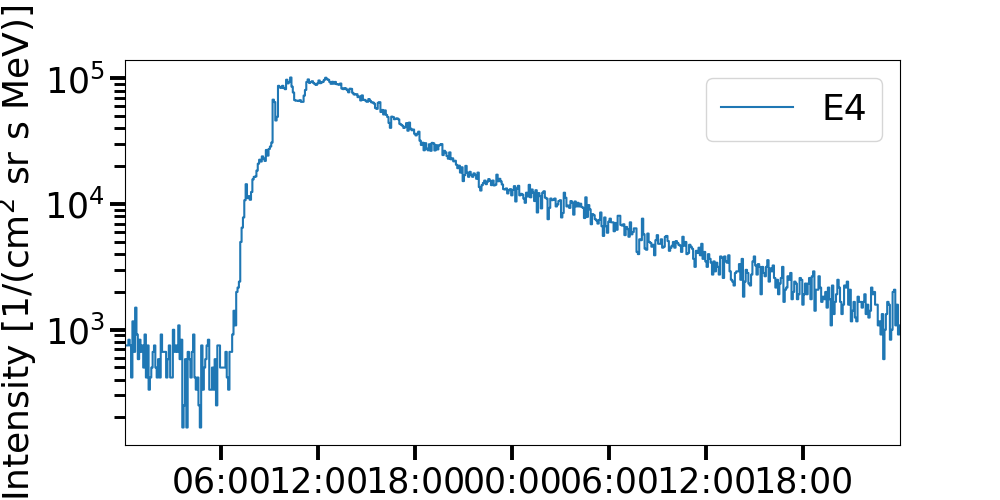

In [50]:
# Initializing the tool with input data
event = reg.Reg(data=df)

# Choose the channel(s) to examine in quicklook plot
channel = "E4" #"H_Flux_0"

# Leaving selection to None 
selection = None

# 
%matplotlib ipympl
event.quicklook(channel=channel, resample="5 min") # selection=["2022-01-20 02:00", "2022-01-20 12:00"]

## Use the find_breakpoints() -method to find a given number of breakpoints in the selected segment of data:

> fill_zeroes (bool) is a switch that applies filling out 0 count bins with a filler value f that satisfies the equation:
$$
\mu_{lg} = \frac{1}{N} \bigg( \sum_{i}^{N_{nz}} \lg(j_{i,nz}) + (N-N_{nz}) \lg(f) \bigg),
$$
> where $\mu_{lg}$ is the logarithm of the mean of the background, $N$ is the total number of data points in the background, $N_{nz}$ is the number of non-zero data in the background, $j_{i, nz}$ is a non-zero intensity measurement in the background and $\lg(\cdot)$ is the 10-base logarithm.
> 
> Setting fill_zeroes = False means 0 counts get ignored altogether.

Data selection: 2022-01-20 00:01:00.451561, 2022-01-20 20:52:00.451561
Regression converged: True


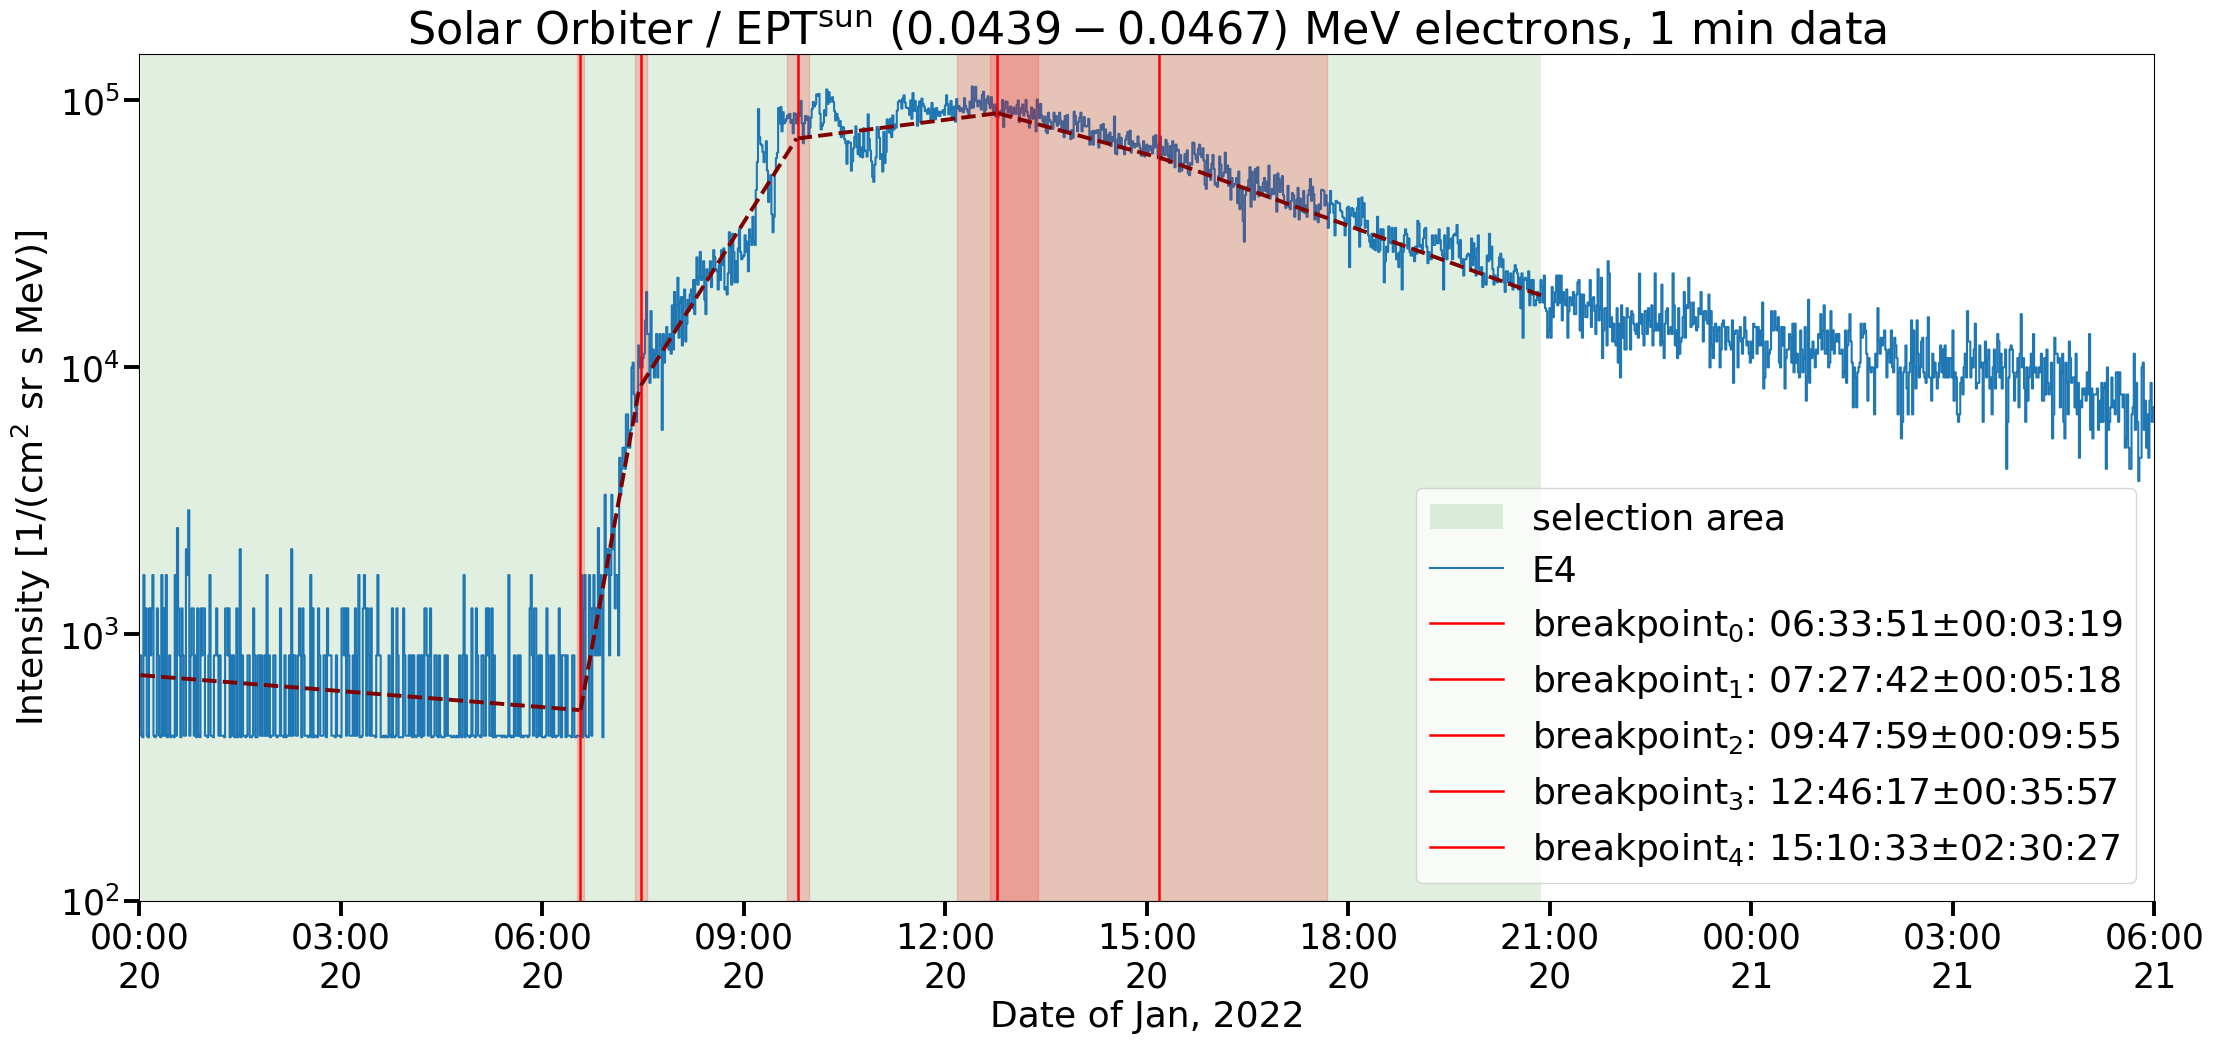

In [52]:
# Title for the figure (optional)
title = r"Solar Orbiter / EPT$^{\mathrm{sun}}$ ($0.0439 - 0.0467$) MeV electrons, 1 min data"

# The channel to consider
#channel = "E5"

# Time-averages the data to given cadence
resample = "1 min"

# The number of breakpoints to seek from the data selection
num_of_breaks = 5

# Boundaries of the time axis
xlim = ["2022-01-20 00:00", "2022-01-21 06:00"]

# Fills zero counts with a filler falue f
fill_zeroes = True

%matplotlib inline
results  = event.find_breakpoints(channel=channel, breaks=num_of_breaks, fill_zeroes=fill_zeroes,
                                  xlim=xlim, title=title, resample=resample, diagnostics=True)

## Display the results:
#### the results are a dictionary that contains the parameters of the fits (constant and slopes), the breakpoints and their 95% confidence intervals, the figure and its axes.

In [47]:
display(results)

{'const': np.float64(9138.187728627425),
 'alpha0': np.float64(-5.561388491346195e-06),
 'alpha1': np.float64(0.0003826401506934387),
 'alpha2': np.float64(0.00011082880472820323),
 'breakpoint0': Timestamp('2022-01-20 06:33:51.636940718'),
 'breakpoint1': Timestamp('2022-01-20 07:27:43.924014568'),
 'breakpoint0_errors': (Timestamp('2022-01-20 06:29:15.851247549'),
  Timestamp('2022-01-20 06:38:27.422633886')),
 'breakpoint1_errors': (Timestamp('2022-01-20 07:20:29.876308203'),
  Timestamp('2022-01-20 07:34:57.971720934')),
 'fig': <Figure size 2600x1100 with 1 Axes>,
 'ax': <Axes: title={'center': 'Solar Orbiter / EPT$^{\\mathrm{sun}}$ ($0.0439 - 0.0467$) MeV electrons, 1 min data'}, xlabel='Date of Jan, 2022', ylabel='Intensity [1/(cm$^{2}$ sr s MeV)]'>,
 'series': datetime
 2022-01-20 00:01:00.451561    2.920098
 2022-01-20 00:02:00.451561    2.619068
 2022-01-20 00:03:00.451561    2.613294
 2022-01-20 00:04:00.451561    3.221128
 2022-01-20 00:05:00.451561    2.920098
            

## Saving the figure:

In [48]:
figure_name = "name_for_your_figure.png"

reg.externals.save_figure(results=results, name=figure_name)